In [1]:
using Pkg,Plots
Pkg.activate("..")
using OpenSAFT

Activating environment at `~/Documents/University/UROP/SAFT codes/OpenSAFT/Project.toml`


┌ Info: Precompiling OpenSAFT [7c7805af-46cc-48c9-995b-ed0ed2dc909a]
└ @ Base loading.jl:1273


 <font size="4">In this notebook we will try to replicate various figures from J. Gross and G. Sadowski's 2002 paper</font>

## Figure 1

In [2]:
# Setting up the models
methanol = system(["methanol"],"PCSAFT")
pentanol = system(["1-pentanol"],"PCSAFT")
nonanol  = system(["1-nonanol"],"PCSAFT");

In [3]:
# Get critical point for all species
(T_c_methanol, p_c_methanol, v_c_methanol) = get_crit_pure(methanol)
(T_c_pentanol, p_c_pentanol, v_c_pentanol) = get_crit_pure(pentanol)
(T_c_nonanol, p_c_nonanol, v_c_nonanol)    = get_crit_pure(nonanol);

In [17]:
# Get saturation properties for all species
T_methanol = range(205, T_c_methanol, length = 100)
T_pentanol = range(200, T_c_pentanol, length = 100)
T_nonanol  = range(260, T_c_nonanol, length = 100)

(P_sat_methanol, v_l_methanol, v_v_methanol) = get_sat_pure(methanol,T_methanol)
(P_sat_pentanol, v_l_pentanol, v_v_pentanol) = get_sat_pure(pentanol,T_pentanol)
(P_sat_nonanol, v_l_nonanol, v_v_nonanol)    = get_sat_pure(nonanol,T_nonanol);

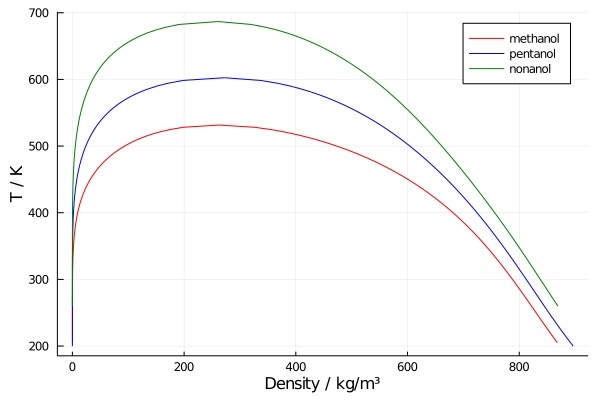

In [18]:
plt = plot(0.032 ./v_l_methanol, T_methanol,color=:red,xlabel="Density / kg/m³",ylabel="T / K", label = "methanol")
plt = plot!(0.032 ./v_v_methanol, T_methanol,color=:red, label = "")
plt = plot!(0.088 ./v_l_pentanol, T_pentanol,color=:blue, label = "pentanol")
plt = plot!(0.088 ./v_v_pentanol, T_pentanol,color=:blue, label = "")
plt = plot!(0.144 ./v_l_nonanol, T_nonanol,color=:green, label = "nonanol")
plt = plot!(0.144 ./v_v_nonanol, T_nonanol,color=:green, label = "")
display(plt)